ЛАБОРАТОРНА РОБОТА No 2

Тема роботи: «Геометричні перетворення координат у просторі».

Мета роботи: опанувати методи елементарних у просторі (афінні 3D-
перетворення, проектування об’єктів на площини), розробити відповідне

програмне забезпечення для виконання практичних завдань, які вимагають
перетворень у 3D-просторі.

In [369]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import math

2. Задати куб через його вершини. Здійснити масштабування куба (збільшення,
зменшення у кілька разів). Записати відповідну матрицю.

In [370]:
def plot_cube(vertices, ax, color='r', label='cube'):
    edges = np.array([
        [vertices[0, :-1], vertices[1, :-1], vertices[2, :-1], vertices[3, :-1]],
        [vertices[4, :-1], vertices[5, :-1], vertices[6, :-1], vertices[7, :-1]],
        [vertices[0, :-1], vertices[1, :-1], vertices[5, :-1], vertices[4, :-1]],
        [vertices[2, :-1], vertices[3, :-1], vertices[7, :-1], vertices[6, :-1]],
        [vertices[1, :-1], vertices[2, :-1], vertices[6, :-1], vertices[5, :-1]],
        [vertices[0, :-1], vertices[3, :-1], vertices[7, :-1], vertices[4, :-1]]
    ])

    poly3d = Poly3DCollection(edges, facecolors='yellow', linewidths=1, edgecolors=color, alpha=0)
    ax.add_collection3d(poly3d)
    ax.add_collection3d(Line3DCollection([], colors=color, linewidths=1, label=label))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    ax.set_zlim([-8, 8])

def apply_transformation(vertices, transformation_matrix):
    transformed_vertices = np.dot(vertices, transformation_matrix.T)
    return transformed_vertices

def plot_plane(vertices, ax, alpha=0.5, facecolors='blue', edgecolors='r'):
    flat = Poly3DCollection([[arr[:-1] for arr in vertices]], alpha=alpha, facecolors=facecolors, edgecolors=edgecolors)
    ax.add_collection3d(flat)
          
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_xlim([-8, 8])
    ax.set_ylim([-8, 8])
    ax.set_zlim([-8, 8])

# Define cube vertices
cube_vertices = np.array([
    [1, 1, 1, 1],
    [3, 1, 1, 1],
    [3, 3, 1, 1],
    [1, 3, 1, 1],
    [1, 1, 3, 1],
    [3, 1, 3, 1],
    [3, 3, 3, 1],
    [1, 3, 3, 1]
])

# Define transformation matrices
matrix_center = np.array([[1, 0, 0, -4],
                          [0, 1, 0, -5],
                          [0, 0, 1, -3],
                          [0, 0, 0, 1]])

matrix_big = np.array([[2, 0, 0, 0],
                       [0, 2, 0, 0],
                       [0, 0, 2, 0],
                       [0, 0, 0, 1]])

matrix_small = np.array([[0.5, 0, 0, 0],
                         [0, 0.5, 0, 0],
                         [0, 0, 0.5, 0],
                         [0, 0, 0, 1]])

matrix_symmetry_origin = np.array([[-1, 0, 0, 0],
                                  [0, -1, 0, 0],
                                  [0, 0, -1, 0],
                                  [0, 0, 0, 1]])

matrix_symmetry_plane = np.array([[1, 0, 0, 0],
                                 [0, -1, 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, 1]])

# Apply transformations to cube vertices
cube_centered = apply_transformation(cube_vertices, matrix_center)
cube_bigger = apply_transformation(cube_centered, matrix_big)
cube_smaller = apply_transformation(cube_centered, matrix_small)
cube_symmetry_origin = apply_transformation(cube_vertices, matrix_symmetry_origin)
cube_symmetry_plane = apply_transformation(cube_vertices, matrix_symmetry_plane)

3. Отриманий результат з попереднього пункту симетрично відобразити
відносно початку координат, відносно однієї з координатних площин у
тривимірній декартовій системі координат (простір).

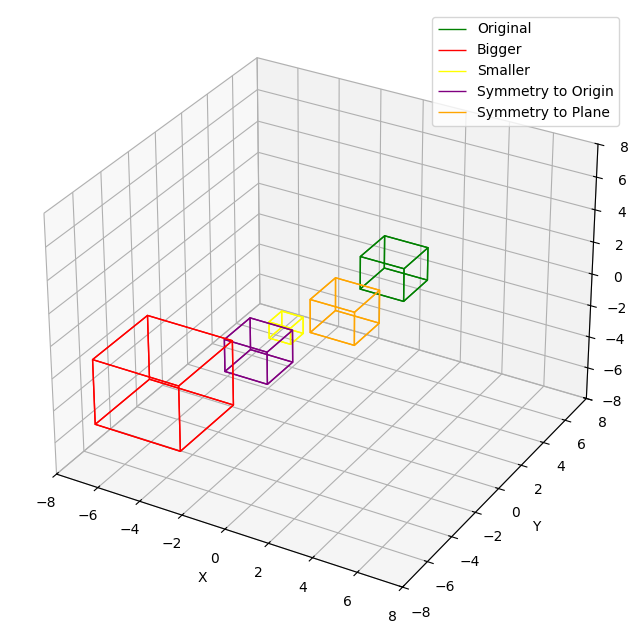

In [371]:
# Plotting cubes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

plot_cube(cube_vertices, ax, label='Original', color='green')
plot_cube(cube_bigger, ax, label='Bigger', color='red')
plot_cube(cube_smaller, ax, label='Smaller', color='yellow')
plot_cube(cube_symmetry_origin, ax, label='Symmetry to Origin', color='purple')
plot_cube(cube_symmetry_plane, ax, label='Symmetry to Plane', color='orange')

plt.legend()
plt.show()

4. Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот
куба відносно прямої на деякий кут φ. Вказати перетворення, які необхідні
для одержання такого результату.

In [372]:
point_on_line = np.array([1, 2, 3])
a, b, c = point_on_line[0], point_on_line[1], point_on_line[2]
direction_vector = np.array([2, 3, 4])

direction_vector = direction_vector / np.linalg.norm(direction_vector)
direction_vector = np.append(direction_vector, 1)

line_0 = np.array([point_on_line + t * direction_vector[:3] for t in np.linspace(-8, 8, 100)])
line_0 = np.hstack([line_0, np.ones((line_0.shape[0], 1))])

In [373]:
# Transformation matrices for the line
matrix_translation_to_origin = np.array([
    [1, 0, 0, -a],
    [0, 1, 0, -b],
    [0, 0, 1, -c],
    [0, 0, 0, 1]
])

l, m, n = direction_vector[0], direction_vector[1], direction_vector[2]
cos_psi = n / math.sqrt(m**2 + n**2)
sin_psi = m / math.sqrt(m**2 + n**2)
matrix_rotation_to_xoz = np.array([
    [1, 0, 0, 0],
    [0, cos_psi, -sin_psi, 0],
    [0, sin_psi, cos_psi, 0],
    [0, 0, 0, 1]
])

cos_phi = l
sin_phi = math.sqrt(1 - l**2)
matrix_rotation_to_z = np.array([
    [cos_phi, -sin_phi, 0, 0],
    [sin_phi, cos_phi, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Inverse rotations and translation
matrix_inverse_rotation_to_z = matrix_rotation_to_z.T
matrix_inverse_rotation_to_xoz = matrix_rotation_to_xoz.T
matrix_translation_from_origin = np.array([
    [1, 0, 0, a],
    [0, 1, 0, b],
    [0, 0, 1, c],
    [0, 0, 0, 1]
])

# Rotation around the z-axis by 180 degrees
theta = np.radians(180)
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)
matrix_rotation_z = np.array([
    [cos_theta, -sin_theta, 0, 0],
    [sin_theta, cos_theta, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Combine all transformations
combined_transformation = (matrix_translation_from_origin @ matrix_inverse_rotation_to_xoz @ 
                           matrix_inverse_rotation_to_z @ matrix_rotation_z @ matrix_rotation_to_z @ 
                           matrix_rotation_to_xoz @ matrix_translation_to_origin)

# Apply transformation to the cube vertices
cube_transformed = apply_transformation(cube_vertices, combined_transformation)

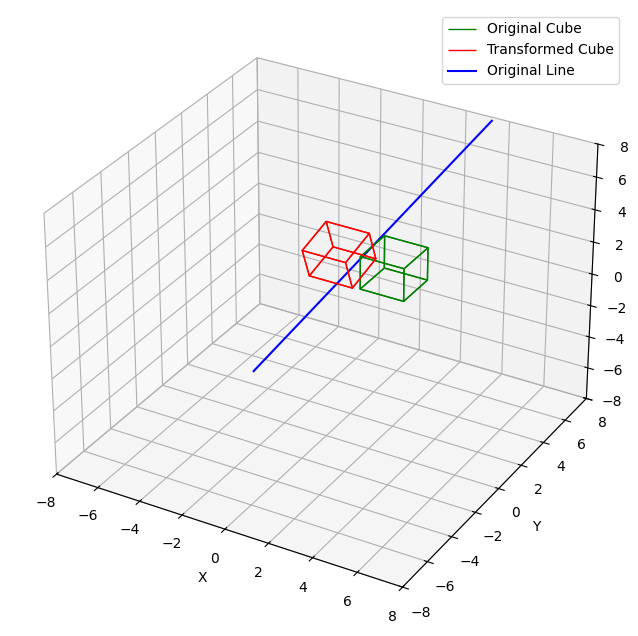

In [374]:
# Plotting the original and transformed cubes along with the line
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original cube
plot_cube(cube_vertices, ax, label='Original Cube', color='green')

# Plot transformed cube
plot_cube(cube_transformed, ax, label='Transformed Cube', color='red')

# Plot original line
ax.plot(line_0[:, 0], line_0[:, 1], line_0[:, 2], label='Original Line', color='blue')

plt.legend()
plt.show()


5. Задати площину, як у прикладі 2, здійснити симетрію куба відносно
площини, вказати всі математичні перетворення, показати кінцевий
результат, який відповідає вимогам задачі. Записати відповідні математичні
перетворення.

In [375]:

# Points
point1 = np.array([1, 2, 3])
point2 = np.array([4, 3, 5])
point3 = np.array([1, 5, 3])

x1, y1, z1 = point1[0], point1[1], point1[2]
x2, y2, z2 = point2[0], point2[1], point2[2]
x3, y3, z3 = point3[0], point3[1], point3[2]

# Рarams
A = np.linalg.det([[y2-y1,z2-z1],
                   [y3-y1,z3-z1]])
B = -np.linalg.det([[x2-x1,z2-z1],
                   [x3-x1,z3-z1]])
C = np.linalg.det([[x2-x1,y2-y1],
                   [x3-x1,y3-y1]])
D = -x1*A-y1*B-z1*C

vector1 = point2 - point1
vector2 = point3 - point1

corner1 = point1
corner2 = point1 + vector1
corner3 = point1 + vector2
corner4 = point1 + vector1 + vector2

flat_vertices = np.array([corner1, corner2, corner4, corner3, corner1])
flat_vertices = np.array([np.append(arr, 1) for arr in flat_vertices])

# Normal vector to plane
triple_sqrt = (A**2+B**2+C**2)**0.5
double_sqrt = (A**2+B**2)**0.5

In [376]:
# Define transformation matrices
M1 = np.array([[1,0,0,0], # Through origin
               [0,1,0,0],
               [0,0,1,D/C],
               [0,0,0,1]])
M2 = np.array([[A/double_sqrt, B/double_sqrt, 0,0],
               [-B/double_sqrt, A/double_sqrt, 0,0],
               [0,0,1,0],
               [0,0,0,1]])
M3 = np.array([[C/triple_sqrt, 0, -double_sqrt/triple_sqrt,0],
               [0, 1, 0,0],
               [double_sqrt/triple_sqrt,0,C/triple_sqrt,0],
               [0,0,0,1]])
M4 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,-1,0],
               [0,0,0,1]])
M5 = M3.T
M6 = M2.T
M7 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,-D/C],
               [0,0,0,1]])

cube_moved = cube_vertices
flat_moved = flat_vertices

transformations = [M1, M2, M3, M4, M5, M6, M7]

for M in transformations: # Applying transformation
    cube_moved = apply_transformation(cube_moved, M)
    flat_moved = apply_transformation(flat_moved, M)


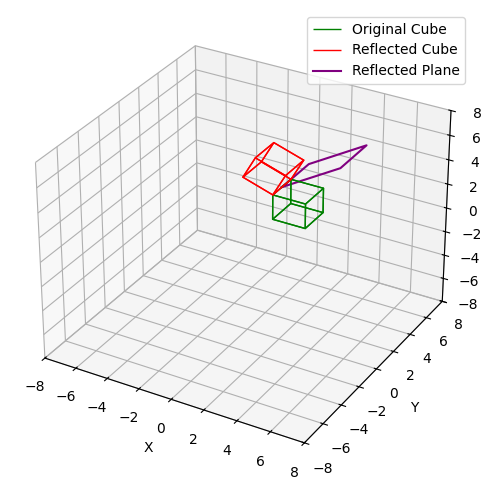

In [377]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_cube(cube_vertices, ax, color='green', label='Original Cube')
plot_cube(cube_moved, ax, color='red', label='Reflected Cube')
#ax.plot(flat_vertices[:, 0], flat_vertices[:, 1], flat_vertices[:, 2], color='blue', label='Original Plane')
ax.plot(flat_moved[:, 0], flat_moved[:, 1], flat_moved[:, 2], color='purple', label='Reflected Plane')

plt.legend()
plt.show()

(для студентів, які навчаються на кафедрі ММАД) Запропонувати інший
набір перетворень для отримання результатів, які наведені у прикладі 2 даної
лабораторної роботи. Тобто здійснити інші перетворення за загальним
підходом (симетрія, поворот, перенесення), показати їх математично.

In [378]:
# New set of transformation matrices
triple_sqrt = (A**2+B**2+C**2)**0.5
double_sqrt = (A**2+B**2)**0.5

# Move to center
M1 = np.array([[1,0,0,D/A],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
# Rotate around y 
M2 = np.array([[A/double_sqrt, 0, B/double_sqrt,0],
               [0, 1, 0,0],
               [-B/double_sqrt,0,A/double_sqrt,0],
               [0,0,0,1]])
# Rotate to ZOY
M3= np.array([[double_sqrt/triple_sqrt, 0, -C/triple_sqrt,0],
               [0, 1, 0,0],
               [C/triple_sqrt,0,double_sqrt/triple_sqrt,0],
               [0,0,0,1]])
# Symmetry to X
M4 = np.array([[-1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
# Rotation from ZOY
M5 = M3.T
# Reverse rotation around y
M6 = M2.T
# Move from the center
M7_ = np.array([[1,0,0,-D/A],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

flat_moved_1_3 = np.dot(flat_vertices, M1.T)
flat_moved_2_3 = np.dot(flat_moved_1_3, M2.T)
flat_moved_3_3 = np.dot(flat_moved_2_3, M3.T)
flat_moved_4_3 = np.dot(flat_moved_3_3, M4.T)
flat_moved_5_3 = np.dot(flat_moved_4_3, M5.T)
flat_moved_6_3 = np.dot(flat_moved_5_3, M6.T)
flat_moved_7_3 = np.dot(flat_moved_6_3, M7.T)

cube_moved_1_3 = np.dot(cube_vertices, M1.T)
cube_moved_2_3 = np.dot(cube_moved_1_3, M2.T)
cube_moved_3_3 = np.dot(cube_moved_2_3, M3.T)
cube_moved_4_3 = np.dot(cube_moved_3_3, M4.T)
cube_moved_5_3 = np.dot(cube_moved_4_3, M5.T)
cube_moved_6_3 = np.dot(cube_moved_5_3, M6.T)
cube_moved_7_3 = np.dot(cube_moved_6_3, M7.T)

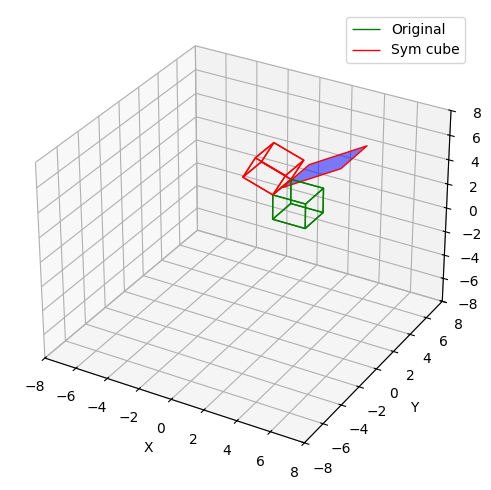

In [379]:
# Plot cubes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_plane(flat_vertices, ax, facecolors='blue', edgecolors='r')
#plot_plane(flat_moved, ax, facecolors='red', edgecolors='r')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_moved, ax, label= 'Sym cube', color = 'red')
plt.legend()
plt.show()

Навести алгоритм з
математичними перетвореннями для побудови симетрії відносно площини на
основі знань з аналітичної геометрії.

In [380]:
from sympy import symbols, Eq, solve

In [381]:
sym_cube = []
for vertex in cube_vertices:
    t = symbols('t')

    x, y, z = vertex[0], vertex[1], vertex[2]
    
    #  t
    equation = Eq(A * (A * t + x) + B * (B * t + y) + C * (C * t + z) + D, 0)
    solution = solve(equation, t)
    
    # finding points that lie on a plane and are on a straight line
    x_o, y_o, z_o = A*solution[0]+x, B*solution[0]+y, C*solution[0]+z

    x_sym, y_sym, z_sym = 2*x_o-x, 2*y_o-y, 2*z_o-z

    point = [x_sym, y_sym, z_sym]
    sym_cube.append(point)

sym_cube = np.array(sym_cube)
sym_cube = np.hstack([sym_cube, np.ones((sym_cube.shape[0], 1))])

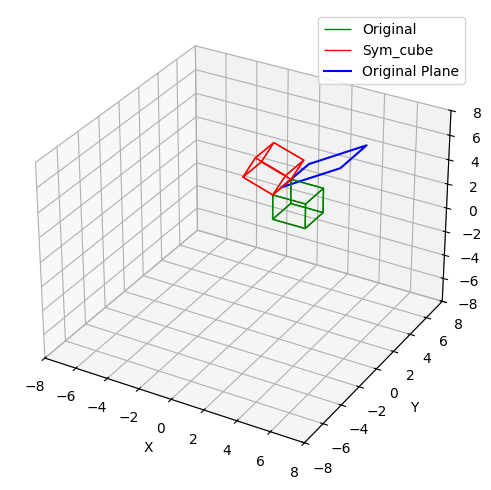

In [382]:
# Plot cubes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(sym_cube, ax, label= 'Sym_cube', color='red')
ax.plot(flat_vertices[:, 0], flat_vertices[:, 1], flat_vertices[:, 2], color='blue', label='Original Plane')
plt.legend()
plt.show()

Взяти той самий куб, який був поданий у попередніх
пунктах. Здійснити ортогональне проектування даного кубу на площину
загального виду, яка не паралельна жодній з координатних площин. Вказати
відповідні математичні перетворення, розробити відповідне програмне
забезпечення.

In [383]:
# Normal plane vector
n_vector = np.array([A/triple_sqrt, B/triple_sqrt, C/triple_sqrt])

# The angle between the planes is the angle between their normals

n = n_vector / np.linalg.norm(n_vector)
    
# Vector normal to z
z_normal = np.array([0, 0, 1])
    
# Cos of the angle between the planes
cos_theta = np.dot(n, z_normal) / (np.linalg.norm(n) * np.linalg.norm(z_normal))
    
angle = np.arccos(cos_theta)
# Plane parallel to Z
M1_10 = np.array([[np.cos(angle),0,np.sin(angle),0],
                  [0, 1, 0, 0],
                  [-np.sin(angle),0,np.cos(angle), 0],
                  [0,0,0,1]])
flat_moved_1_10 = np.dot(flat_vertices, M1_10.T)
# Dis to Z
dis = flat_moved_1_10[0][2]
# Z=0
M2_10 = np.array([[1,0,0,0],
                [0, 1, 0, 0],
                [0,0, 1, dis],
                [0,0,0,1]])
# Orthogonal projection
M3_10 = np.array([[1,0,0,0],
                [0, 1, 0, 0],
                [0,0, 0, 0],
                [0,0,0,1]])
# Move back
M4_10 = np.array([[1,0,0,0],
                [0, 1, 0, 0],
                [0,0, 1, dis],
                [0,0,0,1]])
M5_10 = M1_10.T

flat_moved_1_10 = np.dot(flat_vertices, M1_10.T)
flat_moved_2_10 = np.dot(flat_moved_1_10, M2_10.T)
flat_moved_3_10 = np.dot(flat_moved_2_10, M3_10.T)
flat_moved_4_10 = np.dot(flat_moved_3_10, M4_10.T)
flat_moved_5_10 = np.dot(flat_moved_4_10, M5_10.T)
cube_moved_1_10 = np.dot(cube_vertices, M1_10.T)
cube_moved_2_10 = np.dot(cube_moved_1_10, M2_10.T)
cube_moved_3_10 = np.dot(cube_moved_2_10, M3_10.T)
cube_moved_4_10 = np.dot(cube_moved_3_10, M4_10.T)
cube_moved_5_10 = np.dot(cube_moved_4_10, M5_10.T)

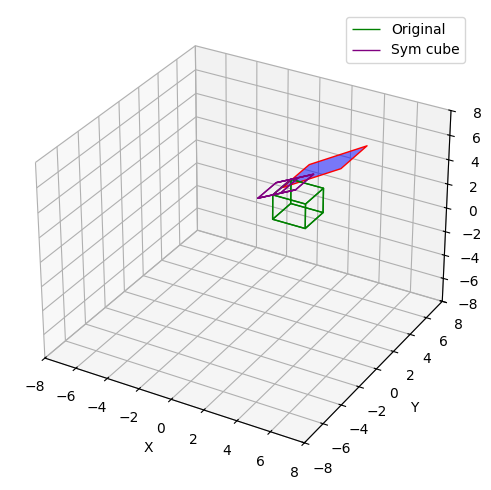

In [384]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
plot_plane(flat_vertices, ax, facecolors='blue', edgecolors='r')
plot_cube(cube_vertices, ax, label= 'Original', color='green')
plot_cube(cube_moved_5_10, ax, label= 'Sym cube', color = 'purple')
plt.legend()
plt.show()